In [57]:
#imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

#importing seaborn (?) https://stackoverflow.com/questions/28828917/error-importing-seaborn-module-in-python
#About Seaborn Libraries: https://seaborn.pydata.org/introduction.html

import seaborn as sns

In [58]:
#import files & read
city = os.path.join('Resources', 'city_data.csv')
ride = os.path.join('Resources', 'ride_data.csv')

city_df = pd.read_csv(city)
ride_df = pd.read_csv(ride)

In [94]:
#merge
merge_df = pd.merge(city_df, ride_df, on = "city", how="inner")
#error1: SyntaxError: EOL while scanning string literal - note: missed "
#merge_df.head()

In [60]:
#Objectives, show the following: 

#1 - Average Fare ($) Per City
#2 - Total Number of Rides Per City
#3 - Total Number of Drivers Per City
#4 - City Type (Urban, Suburban, Rural)

# -----------------------------------------------------------------

#Must cluster cities - groupby

city_groups = merge_df.groupby('city')

#Objective 1: Fare by cities:
avg_fare = city_groups.mean()['fare']
#avg_fare

#Objective 2: Total Number of Rides Per City
rpc = city_groups['ride_id'].count()
#rpc

#Objective 3: Total Number of Drivers Per City
drivers = city_groups.mean()['driver_count']
#drivers

#Objective 4: City Type
city_type = city_df.set_index('city')['type']
#city_type

In [96]:
#review data by creating dataframe:
#note trial 1 had duplicate values because lacked groupby. Requires group by in above frame to ensure unique values.

city_rides = pd.DataFrame({
    "Number of Rides": rpc,
    "Average Fare": avg_fare,
    "Number of Drivers": drivers,
    "Type of City": city_type
})

#city_rides

#arrange by "Type of City
#city_rides.sort_values('Number of Drivers', ascending = False)


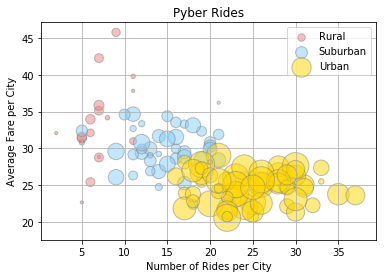

In [62]:
#Calculation of types
rural = city_rides[city_rides["Type of City"] == "Rural"]
suburban = city_rides[city_rides["Type of City"] == "Suburban"]
urban = city_rides[city_rides["Type of City"] == "Urban"]

#Colors - pulled from Resources section below
brand_colors = {"Gold":"#FFD700", "Light Coral": "#F08080", "Light Sky Blue":"#87CEFA"}
colors_assign = {'Urban': brand_colors['Gold'], 'Suburban': brand_colors['Light Sky Blue'], 'Rural': brand_colors['Light Coral']}

#Creating Scatter Plots "Bubble Plots"
#https://python-graph-gallery.com/272-map-a-color-to-bubble-plot/ -----USE EDGECOLORS OR ELSE LOOKS MIXED AND CANNOT BE DISCEREND
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = colors_assign['Rural'], edgecolors="grey", label = 'Rural', alpha = .50)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = colors_assign['Suburban'], edgecolors="grey", label = 'Suburban', alpha = .50)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = colors_assign['Urban'], edgecolors="grey", label = 'Urban', alpha = .50)

#Labels

plt.title('Pyber Rides')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')
plt.grid()
plt.legend()

Text(0.5,1,'% of Total Fares by City Type')

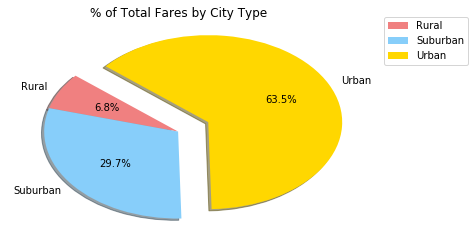

In [84]:
#Additional Pie Charts:

#In addition, you will be expected to produce the following three pie charts:

#% of Total Fares by City Type
#% of Total Rides by City Type
#% of Total Drivers by City Type

#A Total Fares by City Type

fare = merge_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

fare_type_total = fare.sum()['fare']

#print(fare_type_total)

labels = fare_type_total.index
colors = [colors_assign[n] for n in labels]
explode = [0 , 0, 0.25]
plt.pie(fare_type_total, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#        autopct="%12.0f%%", shadow=True, startangle=180)


#moving legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('% of Total Fares by City Type')

Text(0.5,1,'#% of Total Rides by City Type')

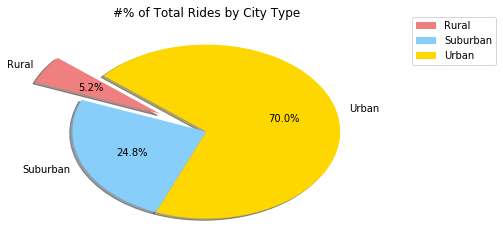

In [93]:
#B Total Rides by City Type

fare = merge_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

rides_total = fare.sum()['ride_id']

#print(fare_type_total)

labels = rides_total.index
colors = [colors_assign[n] for n in labels]
explode = [.4 , 0, 0]
plt.pie(rides_total, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#        autopct="%12.0f%%", shadow=True, startangle=180)


#moving legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('#% of Total Rides by City Type')

Text(0.5,1,'% of Total Drivers by City Type')

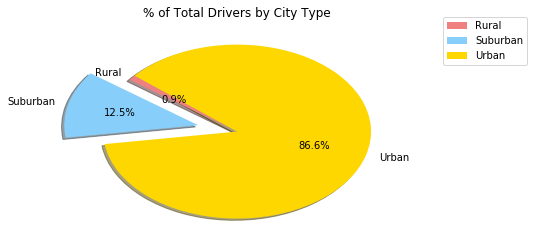

In [92]:
#Additional Pie Charts:

#In addition, you will be expected to produce the following three pie charts:

#% of Total Fares by City Type
#% of Total Rides by City Type
#% of Total Drivers by City Type

#C % of Total Drivers by City Type

fare = merge_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

drivers_total = fare.sum()['driver_count']

#print(fare_type_total)

labels = drivers_total.index
colors = [colors_assign[n] for n in labels]
explode = [0 , .3 , 0]
plt.pie(drivers_total, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#moving legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('% of Total Drivers by City Type')

In [ ]:
#Resources:
#1. Setting Colors: https://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib
#2. Creating Bubble Charts: https://plot.ly/pandas/bubble-charts/

#Colors : https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
brand_colors = {"Gold":"#FFD700", "Light Coral": "#F08080", "Light Sky Blue":"#87CEFA"}
